In [1]:
import xarray
import cmweather
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import glob
%matplotlib inline

In [2]:
run_info = pd.read_csv('/ccsopen/home/rjackson/lidar_proc_test/scaling_runs.csv')
run_info = run_info[['nfft', 'time_window', 'gate_resolution', 'n_workers', 'run_time','num_files']]
run_info

,nfft,time_window,gate_resolution,n_workers,run_time,num_files
0,128,5,30.0,1,6902.482896,4709
1,128,5,30.0,1,7193.928155,4709
2,128,5,60.0,1,6783.433912,4709
3,128,5,90.0,1,6613.908830,4709
4,128,5,120.0,1,6489.708412,4709
...,...,...,...,...,...,...
184,1024,10,120.0,4,1359.609495,4709
185,1024,30,30.0,4,1078.458329,4709
186,1024,30,60.0,4,960.118592,4709
187,1024,30,90.0,4,907.360495,4709


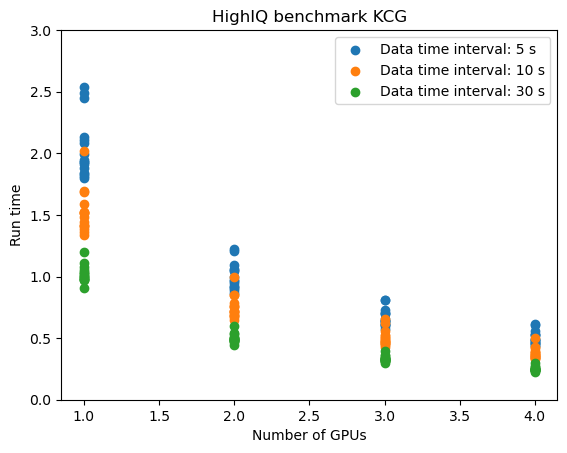

In [3]:
for t in np.unique(run_info['time_window']):
    plt.scatter(run_info['n_workers'].where(run_info['time_window'] == t), 
                run_info['run_time'].where(run_info['time_window'] == t)/3600, 
                label=f"Data time interval: {t} s")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Run time")
plt.legend()
plt.ylim([0, 3])
plt.title('HighIQ benchmark KCG')
plt.savefig('HighIQ_data_time_interval.png')

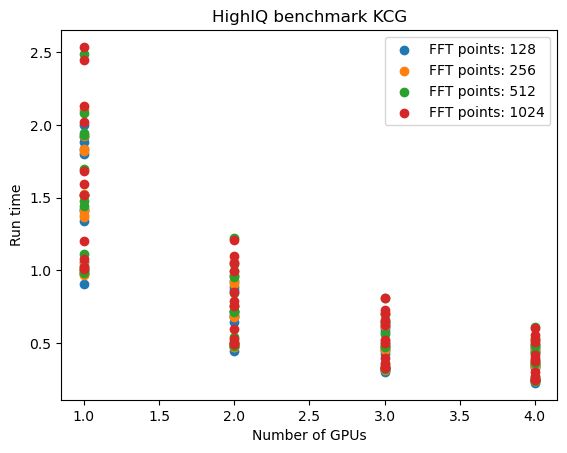

In [4]:
for fft in np.unique(run_info['nfft']):
    plt.scatter(run_info['n_workers'].where(run_info['nfft'] == fft), run_info['run_time'].where(run_info['nfft'] == fft)/3600, label=f"FFT points: {fft}")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Run time")
plt.legend()
plt.title('HighIQ benchmark KCG')
plt.savefig('HighIQ_benchmark_nfft.png')

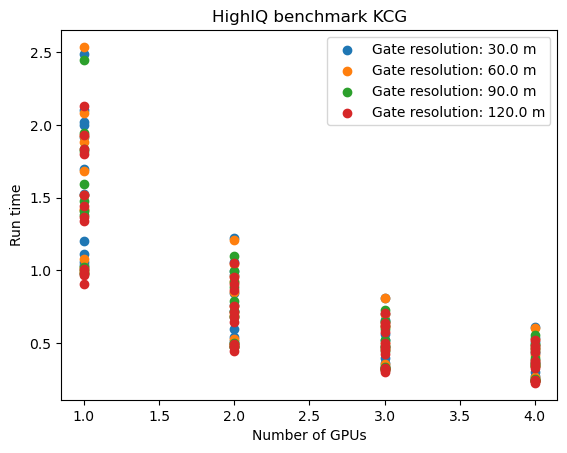

In [5]:
for fft in np.unique(run_info['gate_resolution']):
    plt.scatter(run_info['n_workers'].where(run_info['gate_resolution'] == fft),
                run_info['run_time'].where(run_info['gate_resolution'] == fft)/3600,
                label=f"Gate resolution: {fft} m")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Run time [hr]")
plt.legend()
plt.title('HighIQ benchmark KCG')
plt.savefig('HighIQ_data_time_interval.png')

In [6]:
def load_stares(file_path, date):
    file_list = sorted(glob.glob(file_path + f'kcgdlmomentsM1.{date}.*001*.b1.nc'))
    ds_list = []
    for fi in file_list:
        cur_ds = xr.open_dataset(fi)
        cur_ds = cur_ds.drop("power_spectral_density")
        if cur_ds.sizes["time"] < 10:
            cur_ds.close()
            continue
        print(fi)
        if len(ds_list) > 0:
            cur_ds = cur_ds.sel(time=slice(ds_list[-1]["time"][-1], cur_ds["time"][-1]))
        ds_list.append(cur_ds)
        cur_ds.close()
    return xr.concat(ds_list, dim='time')

In [7]:
ds = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/', '20250401')
ds

/ccsopen/home/rjackson/.conda/envs/cmac_env3/lib/python3.12/site-packages/xarray_sentinel/esa_safe.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.000016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.020017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.030016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.050015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.070016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.080016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.120016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.140016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.150016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.180016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.200015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.210015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.230016.b1.nc


<xarray.Dataset> Size: 242MB
Dimensions:                   (time: 17208, freq: 1024, range: 133, complex: 2,
                               vel_bins: 1024)
Coordinates:
  * complex                   (complex) int16 4B 0 1
  * time                      (time) datetime64[ns] 138kB 2025-04-01T00:00:15...
  * vel_bins                  (vel_bins) float64 8kB -19.35 -19.31 ... 19.31
  * range                     (range) float64 1kB 0.0 90.0 ... 1.188e+04
Dimensions without coordinates: freq
Data variables: (12/14)
    base_time                 (time) datetime64[ns] 138kB 2025-04-01 ... 2025...
    time_offset               (time) datetime64[ns] 138kB 2025-04-01T00:00:17...
    azimuth                   (time) float32 69kB 270.0 270.0 ... 270.0 270.0
    elevation                 (time) float32 69kB 89.98 89.98 ... 89.98 89.98
    lat                       (time) float32 69kB -40.68 -40.68 ... -40.68
    lon                       (time) float32 69kB 144.7 144.7 ... 144.7 144.7
    ...                        ...
    intensity                 (time, range) float64 18MB 1.0 1.0 1.0 ... 1.0 1.0
    radial_velocity_max_peak  (time, range) float32 9MB 0.2646 ... 6.463
    radial_velocity           (time, range) float64 18MB -6.084e+03 ... 2.977...
    spectral_width            (time, range) float64 18MB 3.009e+04 ... 1.473e+05
    skewness                  (time, range) float64 18MB 0.1939 ... -0.1939
    kurtosis                  (time, range) float64 18MB 0.0375 ... 0.03755
Attributes: (12/25)
    command_line:               dlacf_ingest -s kcg -f M1
    Conventions:                ARM-1.2
    process_version:            ingest-dlacf-1.3-0.el7
    dod_version:                dlacf-a1-1.2
    input_source:               /data/collection/kcg/kcgdlacfM1.00/aet_Stare_...
    site_id:                    kcg
    ...                         ...
    target_longitude:           144.69
    target_altitude:            78
    home_point_azimuth:         0
    history:                    created by user dsmgr on machine prod-proc3.a...
    nyquist_velocity:           19.350000 m s-1
    intensity_mask:             0.000000

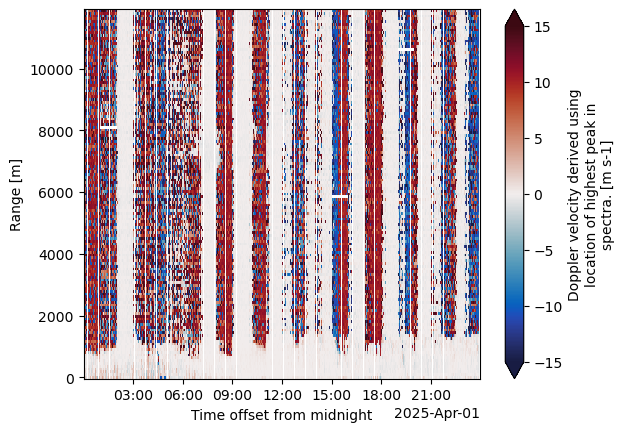

In [8]:
ds['radial_velocity_max_peak'].T.plot(vmin=-15, vmax=15, cmap='balance')

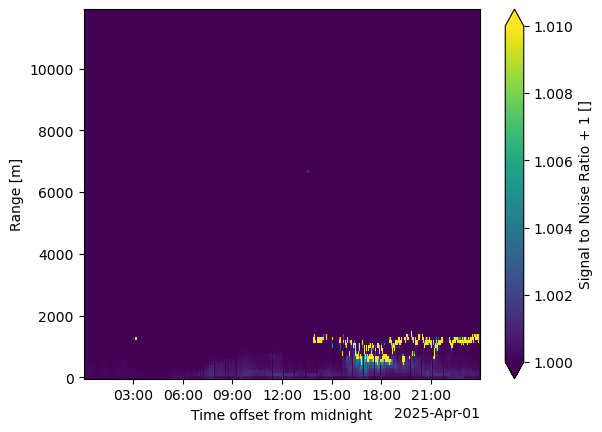

In [19]:
ds['intensity'].T.plot(vmin=1, vmax=1.01)

In [28]:
ds_4g_1024f_5t_90r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/', '20250401')
ds_4g_512f_5t_90r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/', '20250401')
ds_4g_256f_5t_90r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/', '20250401')
ds_4g_1024f_5t_30r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/', '20250401')
ds_4g_512f_5t_30r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/', '20250401')
ds_4g_256f_5t_30r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/', '20250401')
ds_4g_1024f_5t_60r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/', '20250401')
ds_4g_512f_5t_60r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/', '20250401')
ds_4g_256f_5t_60r = load_stares('/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/', '20250401')

/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.000016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.100015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.120016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.140016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.150016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.180016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.200015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.210015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/90res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.000016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.050015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.100015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.110017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.120016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.140016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.170015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.180016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.200015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/90res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.000016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.020017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.030016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.070016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.080016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.120016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.130016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.140016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.170015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.180016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.200015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.210015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/90res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.000016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.020017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.030016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.060016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.080016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.120016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.130016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.140016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.160016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.200015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.210015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/30res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.000016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.010016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.020017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.040015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.100015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.110017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.120016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.140016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.150016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.180016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.190016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.200015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.220016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/30res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.000016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.040015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.050015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.060016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.100015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.110017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.120016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.140016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.160016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.170015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.180016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.200015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.220016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/30res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.000016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.040015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.060016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.120016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.140016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.160016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.180016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.200015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.220016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/1024fft/5time_window/60res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.000016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.040015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.060016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.120016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.140016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.160016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.180016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.200015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.220016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/512fft/5time_window/60res/kcgdlmomentsM1.20250401.230016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.000016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.010016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.020017.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.030016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.040015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.050015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.060016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.070016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.080016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.090016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.100015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.110017.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.120016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.130016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.140016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.150016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.160016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.170015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.180016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.190016.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.200015.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")
/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.210015.b1.nc
/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.220016.b1.nc


/tmp/ipykernel_97/2900444482.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  cur_ds = cur_ds.drop("power_spectral_density")


/gpfs/wolf2/arm/atm124/proj-shared/kcg/kcgdlmomentsM1.b1/4gpus/256fft/5time_window/60res/kcgdlmomentsM1.20250401.230016.b1.nc


/ccsopen/home/rjackson/.conda/envs/cmac_env3/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, 'Noise floor analysis 5 s processing')

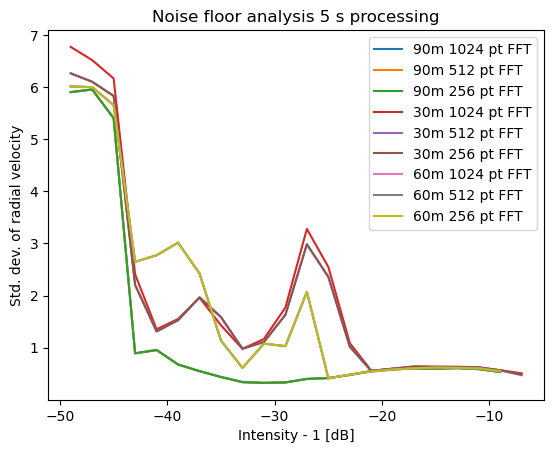

In [35]:
ds_4g_1024f_5t_90r['log_intensity'] = 10*np.log10(ds_4g_1024f_5t_90r['intensity'] - 1)
ds_4g_512f_5t_90r['log_intensity'] = 10*np.log10(ds_4g_512f_5t_90r['intensity'] - 1)
ds_4g_256f_5t_90r['log_intensity'] = 10*np.log10(ds_4g_256f_5t_90r['intensity'] - 1)
ds_4g_1024f_5t_30r['log_intensity'] = 10*np.log10(ds_4g_1024f_5t_30r['intensity'] - 1)
ds_4g_512f_5t_30r['log_intensity'] = 10*np.log10(ds_4g_512f_5t_30r['intensity'] - 1)
ds_4g_256f_5t_30r['log_intensity'] = 10*np.log10(ds_4g_256f_5t_30r['intensity'] - 1)
ds_4g_1024f_5t_60r['log_intensity'] = 10*np.log10(ds_4g_1024f_5t_60r['intensity'] - 1)
ds_4g_512f_5t_60r['log_intensity'] = 10*np.log10(ds_4g_512f_5t_60r['intensity'] - 1)
ds_4g_256f_5t_60r['log_intensity'] = 10*np.log10(ds_4g_256f_5t_60r['intensity'] - 1)
ds_4g_1024f_5t_90r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_1024f_5t_90r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="90m 1024 pt FFT")
ds_4g_512f_5t_90r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_512f_5t_90r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="90m 512 pt FFT")
ds_4g_256f_5t_90r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_256f_5t_90r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="90m 256 pt FFT")
ds_4g_1024f_5t_30r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_1024f_5t_30r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="30m 1024 pt FFT")
ds_4g_512f_5t_30r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_512f_5t_30r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="30m 512 pt FFT")
ds_4g_256f_5t_30r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_256f_5t_30r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="30m 256 pt FFT")
ds_4g_1024f_5t_60r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_1024f_5t_60r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="60m 1024 pt FFT")
ds_4g_512f_5t_60r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_512f_5t_60r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="60m 512 pt FFT")
ds_4g_256f_5t_60r['radial_velocity_max_peak'].groupby_bins(
    ds_4g_256f_5t_60r['log_intensity'], np.arange(-50, 10, 2)).std().plot(label="60m 256 pt FFT")
plt.legend()
plt.xlabel('Intensity - 1 [dB]')
plt.ylabel('Std. dev. of radial velocity')
plt.title('Noise floor analysis 5 s processing')

In [13]:
np.arange(-30, 10, 2)

array([-30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,
        -4,  -2,   0,   2,   4,   6,   8])